In [1]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5

import numpy
import os
# fix random seed for reproducibility
numpy.random.seed(7)

# load pima indians dataset

import matplotlib.pyplot as plt
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('pima-indians-diabetes.data.csv', names=col_names)
# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# selection of relevant features
label = df['label']
df.drop('label', axis=1, inplace=True)

X, Y = df, label
df.describe()

# normalized data
df_norm = (df - df.mean()) / (df.max() - df.min())
X.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [2]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.25)

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [12]:
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(x_train, y_train , verbose=1, eval_metric="error", )
y_pred  = model.predict(x_val)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.12%


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
# exmaple of early stopping
# model.fit(x_train, y_train , early_stopping_rounds=10, eval_metric="logloss", verbose=True )
# y_pred  = model.predict(x_val)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_val, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))


[0.06081081 0.19087838 0.07601351 0.08783784 0.07939189 0.16216215
 0.17398648 0.16891892]


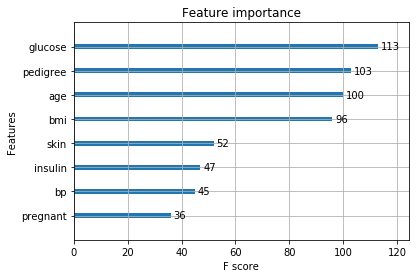

In [21]:
import xgboost
import matplotlib.pyplot as plt
print(model.feature_importances_)
xgboost.plot_importance(model)
plt.show()

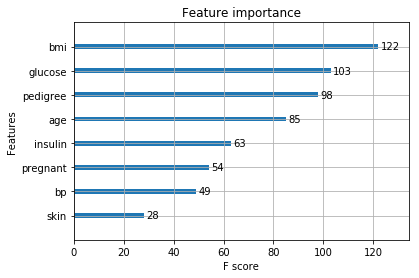

In [22]:

# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# fit model on training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [23]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [25]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X, Y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.7s finished


In [26]:
# Tune learning_rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.483304 using {'learning_rate': 0.1}
-0.689811 (0.000475) with: {'learning_rate': 0.0001}
-0.661827 (0.004625) with: {'learning_rate': 0.001}
-0.531155 (0.028945) with: {'learning_rate': 0.01}
-0.483304 (0.055151) with: {'learning_rate': 0.1}
-0.515642 (0.061723) with: {'learning_rate': 0.2}
-0.554158 (0.067557) with: {'learning_rate': 0.3}


In [5]:
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.483304 using {'learning_rate': 0.1}
-0.689811 (0.000475) with: {'learning_rate': 0.0001}
-0.661827 (0.004625) with: {'learning_rate': 0.001}
-0.531155 (0.028945) with: {'learning_rate': 0.01}
-0.483304 (0.055151) with: {'learning_rate': 0.1}
-0.515642 (0.061723) with: {'learning_rate': 0.2}
-0.554158 (0.067557) with: {'learning_rate': 0.3}
